<a href="https://colab.research.google.com/github/udayapex1/Employee-Salary-Prediction-Uday-Pareta/blob/main/employeeSalaryPredct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
data = pd.read_csv("/content/adult 3 (1).csv")
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# checking missing values
print(data.isna().sum())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [5]:
print("Before:", data['occupation'].value_counts())
data['occupation'].replace({'?': 'not listed'}, inplace=True)
print("After:", data['occupation'].value_counts())


Before: occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
After: occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
not listed           2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-5-390123386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({'?': 'not listed'}, inplace=True)


In [6]:
print("Before:", data['workclass'].value_counts())
data['workclass'].replace({'?': 'not listed'}, inplace=True)
print("After:", data['workclass'].value_counts())


Before: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
After: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
not listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-6-2085909994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'not listed'}, inplace=True)


In [7]:
print("Before:", data['workclass'].unique())
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
print("After:", data['workclass'].unique())


Before: ['Private' 'Local-gov' 'not listed' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
After: ['Private' 'Local-gov' 'not listed' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc']


In [8]:
# Remove Low Education Rows
edu_remove = ['5th-6th', '1st-4th', '7th-8th', '11th', '12th', '9th', '10th']
print("Before:", data['education'].unique())
data = data[~data['education'].isin(edu_remove)]
print("After:", data['education'].unique())


Before: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
After: ['HS-grad' 'Assoc-acdm' 'Some-college' 'Prof-school' 'Bachelors' 'Masters'
 'Doctorate' 'Assoc-voc' 'Preschool']


In [9]:
# : Drop Redundant education Column
data.drop(columns=['education'], inplace=True)
print("Remaining Columns:", data.columns)


Remaining Columns: Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


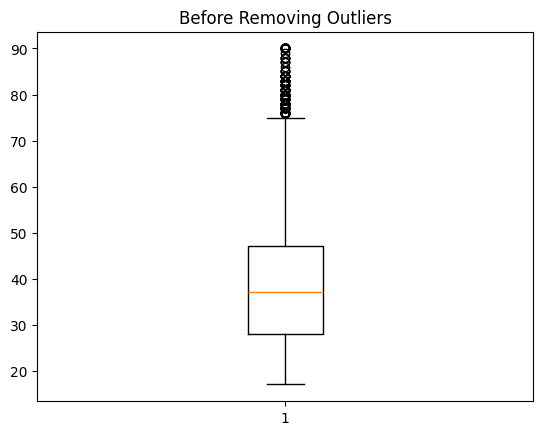

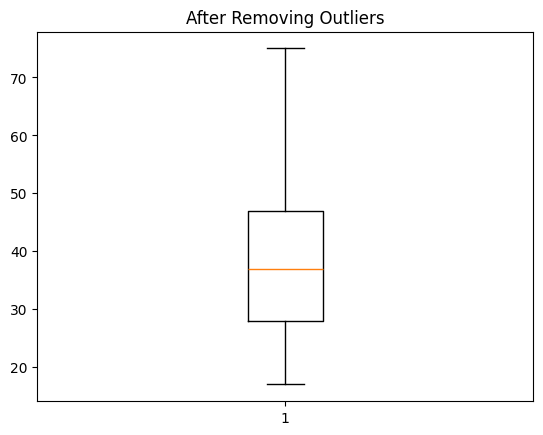

In [10]:
# Handle Age Outliers
plt.boxplot(data['age'])
plt.title("Before Removing Outliers")
plt.show()

data = data[(data['age'] >= 17) & (data['age'] <= 75)]

plt.boxplot(data['age'])
plt.title("After Removing Outliers")
plt.show()


In [11]:
# Encode Categorical Columns ss
encoder = LabelEncoder()

categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
    print(f"{col} encoded successfully.")


workclass encoded successfully.
marital-status encoded successfully.
occupation encoded successfully.
relationship encoded successfully.
race encoded successfully.
gender encoded successfully.
native-country encoded successfully.
income encoded successfully.


In [12]:
# Split Features & Labels
X = data.drop('income', axis=1)
y = data['income']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (42229, 13)
Shape of y: (42229,)


In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (33783, 13)
Test data shape: (8446, 13)


In [14]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training completed.")



Model training completed.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#  Make Prediction0ss

y_pred = model.predict(X_test)
print("First 10 Predictions:", y_pred[:10])
print("Actual Labels:", y_test[:10].values)


First 10 Predictions: [0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 0 0 0 0 0 0 0 0]


Accuracy Score: 0.7861709685058016
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      6151
           1       0.71      0.36      0.48      2295

    accuracy                           0.79      8446
   macro avg       0.75      0.65      0.67      8446
weighted avg       0.77      0.79      0.76      8446



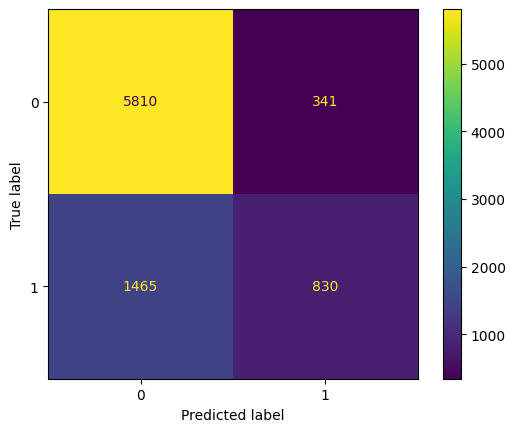

In [18]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before:", Counter(y_train))
print("After :", Counter(y_resampled))


In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter  # Add this line

# Balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before:", Counter(y_train))
print("After :", Counter(y_resampled))


Before: Counter({0: 24813, 1: 8970})
After : Counter({0: 24813, 1: 24813})


In [21]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)


In [24]:
# accuracy and confusion matrix again
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.694529955008288
Confusion Matrix:
 [[4443 1708]
 [ 872 1423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77      6151
           1       0.45      0.62      0.52      2295

    accuracy                           0.69      8446
   macro avg       0.65      0.67      0.65      8446
weighted avg       0.73      0.69      0.71      8446



In [25]:
# Trying a more powerful model like Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8340042623727209
Confusion Matrix:
 [[5363  788]
 [ 614 1681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6151
           1       0.68      0.73      0.71      2295

    accuracy                           0.83      8446
   macro avg       0.79      0.80      0.80      8446
weighted avg       0.84      0.83      0.84      8446



In [ ]:
# Handling missing values
data = data.dropna()

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['workclass'] = label_encoder.fit_transform(data['workclass'])
# Repeat for other categorical columns

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])


In [29]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [31]:
# Handling missing values
data = data.dropna()
print("Data shape after dropping null values:", data.shape)

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Example: encode multiple columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("Label encoding done for categorical columns.")

# Scaling numerical columns
from sklearn.preprocessing import StandardScaler

# Automatically select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

print("Scaled data shape:", data_scaled.shape)
print("First 5 rows of scaled data:")
print(data_scaled[:5])


Data shape after dropping null values: (42229, 14)


KeyError: 'education'

In [32]:
print(data.columns)



Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# These are the actual categorical columns in your data:
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country', 'income']

# Apply label encoding
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [34]:
from sklearn.preprocessing import StandardScaler

# These are the numerical columns:
numerical_cols = ['age', 'fnlwgt', 'educational-num',
                  'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [36]:
# Handling missing values
data = data.dropna()
print("Data shape after dropping null values:", data.shape)

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Example: encode multiple columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
# for col in categorical_cols:
#     data[col] = label_encoder.fit_transform(data[col])



print("Label encoding done for categorical columns.")

# Scaling numerical columns
from sklearn.preprocessing import StandardScaler

# Automatically select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

print("Scaled data shape:", data_scaled.shape)
print("First 5 rows of scaled data:")
print(data_scaled[:5])


Data shape after dropping null values: (42229, 14)
Label encoding done for categorical columns.
Scaled data shape: (42229, 14)
First 5 rows of scaled data:
[[-0.03030798 -0.31331308 -0.94156506 -0.88026777 -0.38297896 -0.54229829
  -0.88329318  0.38607276  0.70916737 -0.15155551 -0.22421456  0.74226468
   0.26587482 -0.6031663 ]
 [-0.81517079 -1.10392544  1.41884408  0.64372926 -0.38297896  0.83719358
  -0.88329318  0.38607276  0.70916737 -0.15155551 -0.22421456 -0.08981026
   0.26587482  1.65791756]
 [ 0.4406097  -0.31331308 -0.26813256 -0.37226876 -0.38297896 -0.08246767
  -0.88329318 -1.98585805  0.70916737  0.82174801 -0.22421456 -0.08981026
   0.26587482  1.65791756]
 [-1.6000336   2.84913638 -0.81087852 -0.37226876  0.95588593  1.75685483
   0.98656668  0.38607276 -1.41010436 -0.15155551 -0.22421456 -0.9218852
   0.26587482 -0.6031663 ]
 [-0.73668451  2.84913638  0.36894878 -0.88026777  0.95588593  1.75685483
   1.60985329 -1.98585805  0.70916737 -0.15155551 -0.22421456 -0.089810

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check new class distribution
from collections import Counter
print(Counter(y_res))


Counter({0: 30964, 1: 30964})


In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({0: 30964, 1: 11265})
After SMOTE: Counter({0: 30964, 1: 30964})


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_res, y_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [41]:
LogisticRegression(max_iter=2000)
LogisticRegression(max_iter=1000, solver='liblinear')


LogisticRegression(max_iter=1000, solver='liblinear')

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7861709685058016
Confusion Matrix:
 [[5810  341]
 [1465  830]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      6151
           1       0.71      0.36      0.48      2295

    accuracy                           0.79      8446
   macro avg       0.75      0.65      0.67      8446
weighted avg       0.77      0.79      0.76      8446



In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_res, y_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
from sklearn.linear_model import LogisticRegression

# Model training
model = LogisticRegression(max_iter=1000)  # ya koi aur solver bhi ho sakta hai
model.fit(X_train, y_train)
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [49]:

from sklearn.linear_model import LogisticRegression

# Model training
model = LogisticRegression(solver='saga', max_iter=3000)
model.fit(X_train, y_train)
print("Model Trained Successfully ✅")



Model Trained Successfully ✅


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.778001420790907
Confusion Matrix:
 [[5928  223]
 [1652  643]]


In [ ]:
sample_input = [[39, 1, 6, 4, 13, 4, 2174, 0, 40, 9]]  # example
sample_pred = model.predict(sample_input)
print("Predicted Income Category:", sample_pred)


In [53]:
print(X_train.shape[1])  # This should print 13


13


In [54]:
# 13 values ka sample input (replace these values as per your dataset features)
sample_input = [[39, 1, 6, 4, 13, 4, 2174, 0, 40, 9, 1, 0, 0]]

# Convert to DataFrame to match training data format
sample_input_df = pd.DataFrame(sample_input, columns=X_train.columns)

# Predict
sample_pred = model.predict(sample_input_df)
print("Predicted Income Category:", sample_pred[0])


Predicted Income Category: 0


In [55]:
# Sample with features pointing to high income person
sample_input = [[45, 1, 0, 0, 14, 0, 99999, 0, 60, 0, 1, 0, 0]]
sample_input_df = pd.DataFrame(sample_input, columns=X_train.columns)
sample_pred = model.predict(sample_input_df)
print("Predicted Income Category:", sample_pred[0])


Predicted Income Category: 0


In [56]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Train Accuracy: 0.7742947636385165
Test Accuracy: 0.778001420790907


In [57]:
print(y.value_counts(normalize=True))



income
0    0.73324
1    0.26676
Name: proportion, dtype: float64


In [ ]:
from sklearn.utils import resample

# Combine X and y
data = pd.concat([X, y], axis=1)

# Split majority and minority
majority = data[data.salary == 0]
minority = data[data.salary == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                               replace=True,     # sample with replacement
                               n_samples=len(majority),  # to match majority
                               random_state=42)

# Combine back
upsampled = pd.concat([majority, minority_upsampled])

# Separate again
X_balanced = upsampled.drop("salary", axis=1)
y_balanced = upsampled["salary"]


In [ ]:
# Load the dataset again if needed
df = pd.read_csv("/content/adult 3 (1).csv")

# Ab plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='salary')
plt.title("Income Distribution")
plt.savefig("income_distribution.png")  # Save as image
plt.show()

In [62]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


/tmp/ipython-input-63-3302585196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette="Set2")


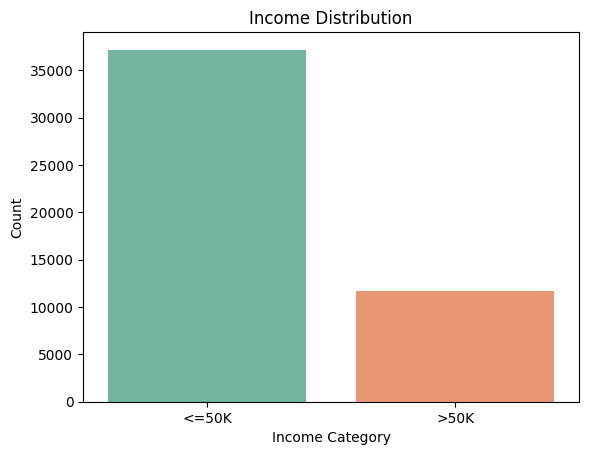

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot income distribution
sns.countplot(data=df, x='income', palette="Set2")
plt.title("Income Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.savefig("income_distribution.png")  # Save for SS
plt.show()


In [ ]:
sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample)
print("Predicted Income Category:", predicted_class[0])


In [68]:
# Prediction sample input
sample = pd.DataFrame([X_test.iloc[0]], columns=X_test.columns)

# Predict class
predicted_class = model.predict(sample)

# Decode label
predicted_label = label_encoder.inverse_transform(predicted_class)

# Output
print("Predicted Income Category:", predicted_class[0])
print("Predicted Label:", predicted_label[0])


Predicted Income Category: 0
Predicted Label: 0


In [69]:
label_encoder = LabelEncoder()
label_encoder.fit(df['income'])


LabelEncoder()

In [70]:
predicted_class = model.predict(sample)
predicted_label = label_encoder.inverse_transform(predicted_class)

print("Predicted Income Category:", predicted_class[0])
print("Predicted Label:", predicted_label[0])


Predicted Income Category: 0
Predicted Label: <=50K


In [71]:
# Prediction
predicted_class = model.predict(sample)
predicted_label = label_encoder.inverse_transform(predicted_class)

# Final Output
print("🎯 Predicted Income Category (Encoded):", predicted_class[0])
print("✅ Predicted Income Label (Original):", predicted_label[0])


🎯 Predicted Income Category (Encoded): 0
✅ Predicted Income Label (Original): <=50K


In [74]:
import numpy as np

# ✔️ Replace with real encoded values
sample = np.array([[39, 13, 2, 1, 2174, 0, 40, 4, 1, 2, 1, 0, 77516]])

# 🔮 Predict
predicted_class = model.predict(sample)
predicted_label = label_encoder.inverse_transform(predicted_class)

# ✅ Output
print("🎯 Predicted Income Category (Encoded):", predicted_class[0])
print("✅ Predicted Income Label (Original):", predicted_label[0])


🎯 Predicted Income Category (Encoded): 0
✅ Predicted Income Label (Original): <=50K


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
